# American Sign Language (ASL) is a natural language that serves as the predominant sign language of Deaf communities in the United States and most of Anglophone Canada. Besides North America, dialects of ASL and ASL-based creoles are used in many countries around the world, including much of West Africa and parts of Southeast Asia. ASL is also widely learned as a second language, serving as a lingua franca. ASL is most closely related to French Sign Language

# Import some dependencies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the csv file

In [2]:
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

# Take a look at train dataset

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


# Shape of train dataset

In [4]:
train.shape

(27455, 785)

# Take a look of test dataset 

In [5]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


# Shape of test dataset

In [6]:
test.shape

(7172, 785)

# Visualization

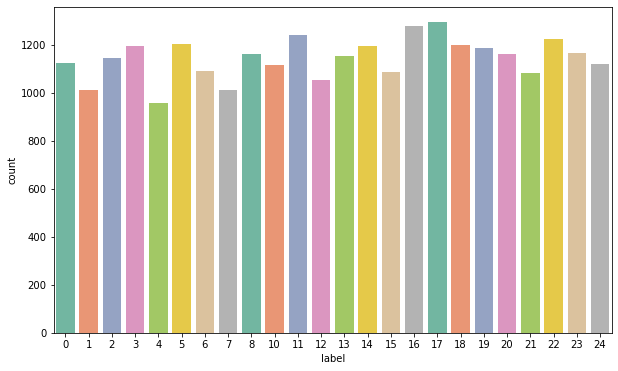

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10,6))
sns.countplot(train["label"], palette="Set2")

# Here we see that, after 8, comes 10.. so if after inverse labelbinarizer the label shows 9 or greater, then we need to add 1..


# Split the dataset

In [8]:
y_train = train["label"]
X_train = train.drop("label", axis=1)

y_test = test["label"]
X_test = test.drop("label", axis=1)

# labelbinarizer convert your label
# think labels = ['A', 'B', 'C'... ...]
# then B will convert like 0 1 0 0 0
# A will convert like 1 0 0 0 0

In [9]:
from sklearn.preprocessing import LabelBinarizer
encode = LabelBinarizer()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)

# Train and test values

In [10]:
X_train = X_train.values

X_test = X_test.values

In [11]:
X_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]], dtype=int64)

# Normalize the values. By dividing 255, value will convert in range 0 to 1

In [12]:
X_train = X_train / 255
X_test = X_test / 255

# Reshape the array

In [13]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [14]:
X_train.shape

(27455, 28, 28, 1)

# train data visualization

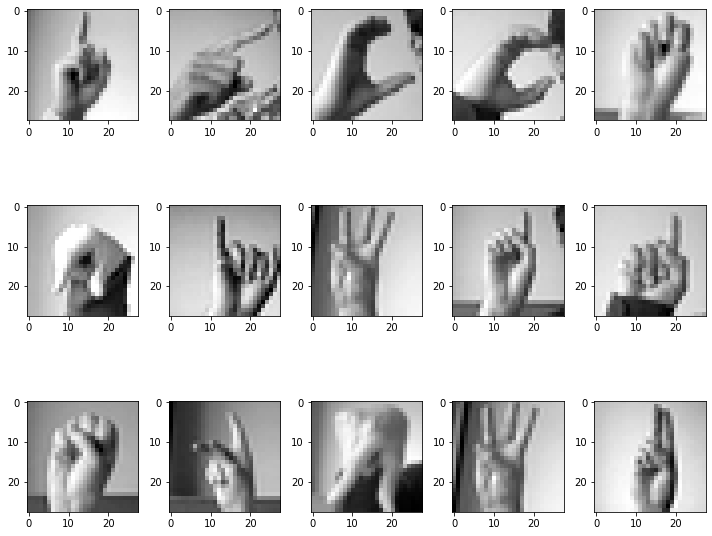

In [15]:
f, ax = plt.subplots(3,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

# test data visualization

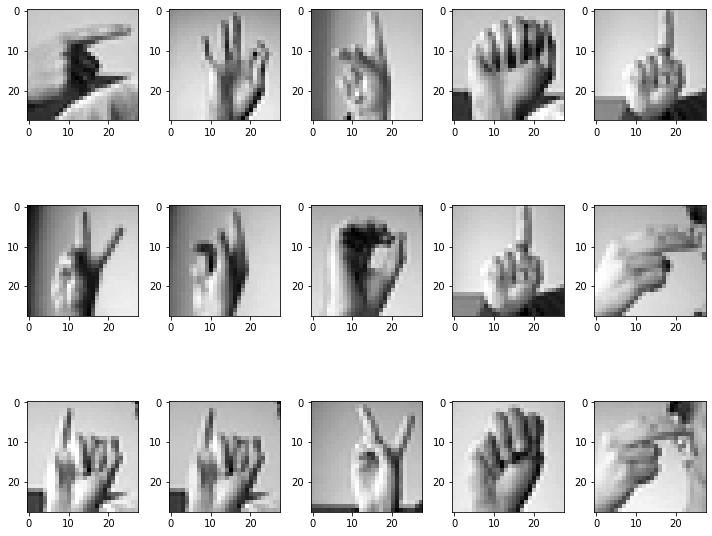

In [16]:
f, ax = plt.subplots(3,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(X_test[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

# import some dependencies

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


# Data augmentation

## Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks


In [18]:
datagen = ImageDataGenerator(featurewise_center=False, #featurewise_center: Boolean. Set input mean to 0 over the dataset, feature-wise.
    samplewise_center=False, # samplewise_center: Boolean. Set each sample mean to 0.
    featurewise_std_normalization=False, # featurewise_std_normalization: Boolean. Divide inputs by std of the dataset, feature-wise.
    samplewise_std_normalization=False, # samplewise_std_normalization: Boolean. Divide each input by its std.
    zca_whitening=False, # zca_whitening: Boolean. Apply ZCA whitening.
    zca_epsilon=1e-06, # zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
    rotation_range=15, # rotation_range: Int. Degree range for random rotations.
    width_shift_range=0.1, # shift image horizontally
    height_shift_range=0.1, # shift image vertically
    shear_range=0.3, # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.1, # zoom range 
    channel_shift_range=0.0, # Range for random channel shifts. 
    fill_mode="nearest",
    horizontal_flip=False, # horizontally flip image
    vertical_flip=True, # vertically flip image
    validation_split=0.0,)

datagen.fit(X_train)

In [19]:
model = Sequential()

model.add(Conv2D(32 , (3,3), input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , padding = 'same'))

model.add(Conv2D(64 , (3,3)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64 , (3,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

history = model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 20 , validation_data = (X_test, y_test))

Epoch 1/20
858/858 [==============================] - 90s 105ms/step - loss: 1.2270 - accuracy: 0.6019 - val_loss: 0.4622 - val_accuracy: 0.8358
Epoch 2/20
858/858 [==============================] - 83s 97ms/step - loss: 0.3835 - accuracy: 0.8674 - val_loss: 0.1754 - val_accuracy: 0.9431
Epoch 3/20
858/858 [==============================] - 83s 96ms/step - loss: 0.2249 - accuracy: 0.9225 - val_loss: 0.0819 - val_accuracy: 0.9769
Epoch 4/20
858/858 [==============================] - 83s 96ms/step - loss: 0.1651 - accuracy: 0.9423 - val_loss: 0.3110 - val_accuracy: 0.8907
Epoch 5/20
858/858 [==============================] - 85s 99ms/step - loss: 0.1418 - accuracy: 0.9525 - val_loss: 0.3293 - val_accuracy: 0.8971
Epoch 6/20
858/858 [==============================] - 83s 97ms/step - loss: 0.1148 - accuracy: 0.9606 - val_loss: 0.0555 - val_accuracy: 0.9820
Epoch 7/20
858/858 [==============================] - 84s 97ms/step - loss: 0.1079 - accuracy: 0.9652 - val_loss: 0.1750 - val_accuracy

In [20]:
score = model.evaluate(X_test, y_test)

225/225 [==============================] - 2s 10ms/step - loss: 0.2044 - accuracy: 0.9499


# analyze data

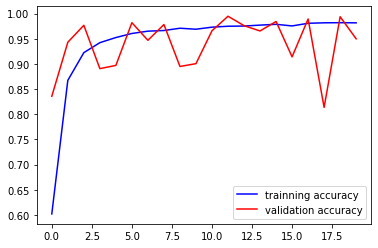

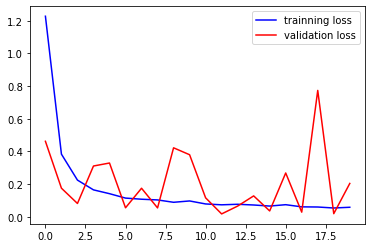

In [21]:
accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_acc, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# Some prediction, if prediction is >= 9, then we will add 1, so, 9 becomes 10... Otherwise it will show wrong...

In [22]:
predictions = model.predict_classes(X_test)

for i in range(len(predictions)):
    if predictions[i] >= 9:
        predictions[i] += 1
predictions[:10]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([ 6,  5, 10,  0,  3, 21, 10, 14,  3, 19], dtype=int64)

# save model

In [23]:
model.save("hand5.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: hand5.model\assets


# Some predictions

In [32]:
import cv2
import tensorflow as tf
labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img_array = img_array / 255.0
    new_array = cv2.resize(img_array, (28, 28))
    return new_array.reshape(-1, 28, 28, 1)

model = tf.keras.models.load_model("hand5.model")

In [33]:
prediction = model.predict_classes([prepare("E:\\hand sign\\3258_5337_bundle_archive\\ges.png")])
print(labels[(prediction[0])])

I


In [34]:
prediction = model.predict_classes([prepare("E:\\hand sign\\3258_5337_bundle_archive\\a.png")])
print(labels[(prediction[0])])

A


In [35]:
prediction = model.predict_classes([prepare("E:\\hand sign\\3258_5337_bundle_archive\\b.png")])
print(labels[(prediction[0])])

P


In [36]:
prediction = model.predict_classes([prepare("E:\\hand sign\\3258_5337_bundle_archive\\c.png")])
print(labels[(prediction[0])])

C


In [37]:
prediction = model.predict_classes([prepare("E:\\hand sign\\3258_5337_bundle_archive\\e.png")])
print(labels[(prediction[0])])

E


In [38]:
prediction = model.predict_classes([prepare("E:\\hand sign\\3258_5337_bundle_archive\\d.png")])
print(labels[(prediction[0])])

D


In [39]:
prediction = model.predict_classes([prepare("E:\\hand sign\\3258_5337_bundle_archive\\i.png")])
print(labels[(prediction[0])])

X


In [40]:
prediction = model.predict_classes([prepare("E:\\hand sign\\3258_5337_bundle_archive\\y.png")])
print(labels[(prediction[0])])

Y
